In [1]:
#Algorithm based Missing value imputation.
#Consider the impact of other variables on missing value n imputes accordingly.
#Mice: Multiariate Imputation using chained equations.
#Siultaneosuly imputes both Numeric and non numeric missing values.
#Chained equations wherein the missing value column/varaible is treated
#as dependent variable and relevent classification/regression model is 
#build and prediction done
#Missing value will be replaced with predicted value.
#Python-sklearn Iterative impute(experimental phase)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Irshad\Desktop\PGA28\Datasets\Flu shot learning"

C:\Users\Irshad\Desktop\PGA28\Datasets\Flu shot learning


In [3]:
flutrain=pd.read_csv("training_set_features.csv")

In [4]:
flutest=pd.read_csv("test_set_features.csv")

In [5]:
flulabels=pd.read_csv("training_set_labels.csv")

In [6]:
print(flutrain.shape)
print(flutest.shape)
print(flulabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [7]:
flutrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
# Combine both dataframes for preprocessing
combinedf=pd.concat([flutrain,flutest],axis=0)

In [9]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [10]:
combinedf=combinedf.drop('respondent_id', axis=1)

In [11]:
# For using Iterative Imputer in sklearn which is experimental as of now 
# 1) remove variables or columns not needed
# 2) Labelencode all objects and categorical data but retain the missing value as it is.

In [12]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
original=combinedf

In [15]:
mask=combinedf.isnull()

In [16]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [17]:
combinedf=combinedf.where(~mask,original)

In [18]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [19]:
from sklearn.experimental import enable_iterative_imputer

In [20]:
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [21]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",
                        max_iter=20)

In [22]:
combinedf_impute=imputer.fit_transform(combinedf)

C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\Irshad\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

<AxesSubplot:>

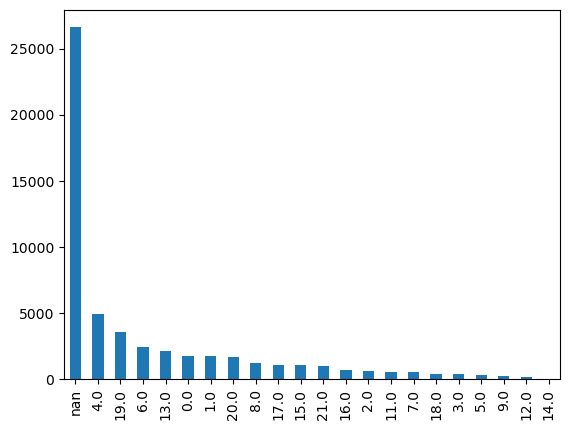

In [24]:
combinedf.employment_industry.value_counts(dropna=False).plot(kind="bar")

<AxesSubplot:>

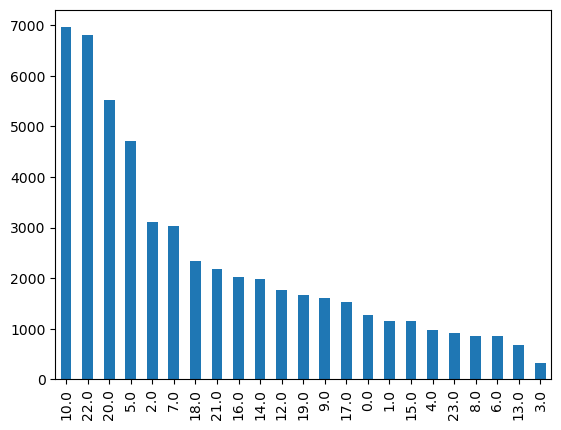

In [25]:
combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind="bar")

In [26]:
#Split Data back to train n test
flu_train=combinedf_impute.loc[0:26706]

In [27]:
flu_test=combinedf_impute.loc[26707:53414]

In [28]:
print(flu_train.shape)
print(flutrain.shape)
print(flu_test.shape)
print(flutest.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


<AxesSubplot:>

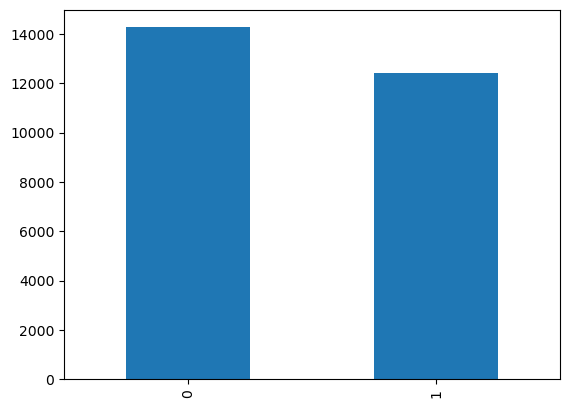

In [30]:
flulabels.seasonal_vaccine.value_counts().plot(kind='bar')

<AxesSubplot:>

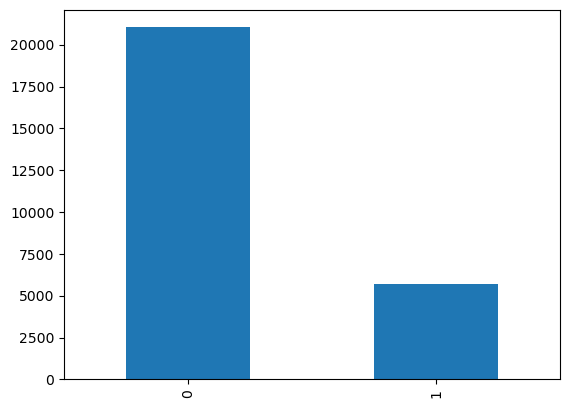

In [31]:
flulabels.h1n1_vaccine.value_counts().plot(kind='bar')

In [32]:
y=flulabels.h1n1_vaccine
X=flu_train

In [33]:
y=LabelEncoder().fit_transform(y)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay

In [43]:
logit=LogisticRegression(max_iter=1000).fit(X,y)

In [44]:
logit.score(X,y)

0.8303441045418805

In [45]:
logitpredict=logit.predict(X)

In [46]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.81      0.83      0.81     26707



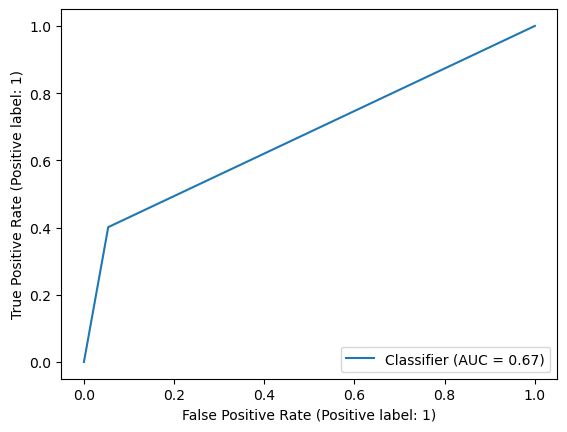

In [48]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [ ]:
# Imbalance Data is a problem in classification both in binary and multinomial
# Majority class willbe more than 70% and minority class is less than 30%
# Model performance will be severely effected.
# In Imbalance Data classification Accuracy of the model will be good but sensitivity/Recall
# Precision and F1 score of minority class is worst.
# Even AUC will be bad for Imbalance Data Model
# Classification report must be checked in case of Imbalance Data

# Dealing with Imbalance Data - Sampling methods must be used.
# Oversampling and undersampling.
# 1) Ramdom Oversampling is where observations from majority class are duplicated.
# 2) Ramdom Oversampling is where observations from majority class are deleted.

# Undersampling is used when there is Large scale data
# OverSampling is used when Data size is small.

In [49]:
!pip install imblearn

     ------------------------------------- 226.0/226.0 kB 21.0 kB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 19.7 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [50]:
from imblearn.under_sampling import RandomUnderSampler

In [51]:
rus=RandomUnderSampler(random_state=42)

In [52]:
X_rus,y_rus=rus.fit_resample(X,y)

In [53]:
print(pd.DataFrame(y).value_counts())

0    21033
1     5674
dtype: int64


In [54]:
print(pd.DataFrame(y_rus).value_counts())

0    5674
1    5674
dtype: int64


In [57]:
logit_rus=LogisticRegression(max_iter=1000)

In [58]:
logit_rus_model=logit_rus.fit(X_rus,y_rus)

In [59]:
logit_rus_model.score(X_rus,y_rus)

0.7574021854071202

In [81]:
logit_rus_pred=logit_rus_model.predict(X_rus)

In [82]:
print(classification_report(y_rus,logit_rus_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5674
           1       0.77      0.73      0.75      5674

    accuracy                           0.76     11348
   macro avg       0.76      0.76      0.76     11348
weighted avg       0.76      0.76      0.76     11348



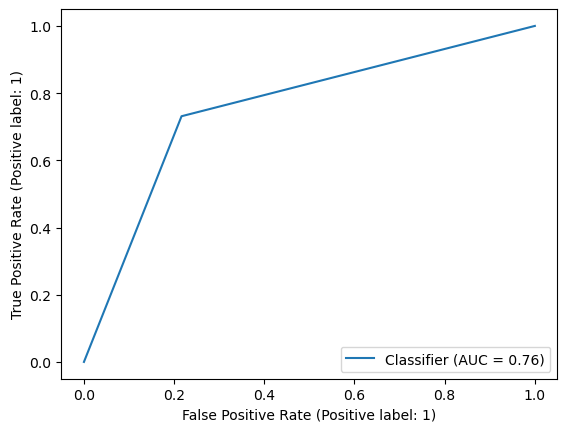

In [83]:
RocCurveDisplay.from_predictions(y_rus,logit_rus_pred)

In [64]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [67]:
X_ros,y_ros=ros.fit_resample(X,y)

In [68]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_ros).value_counts())

0    21033
1     5674
dtype: int64
0    21033
1    21033
dtype: int64


In [65]:
logit_ros=LogisticRegression(max_iter=1000)

In [69]:
logit_ros_model=logit_ros.fit(X_ros,y_ros)

In [70]:
logit_ros_model.score(X_ros,y_ros)

0.7559549279703324

In [77]:
logit_ros_pred=logit_ros_model.predict(X_ros)

In [78]:
print(classification_report(y_ros,logit_ros_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     21033
           1       0.77      0.73      0.75     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



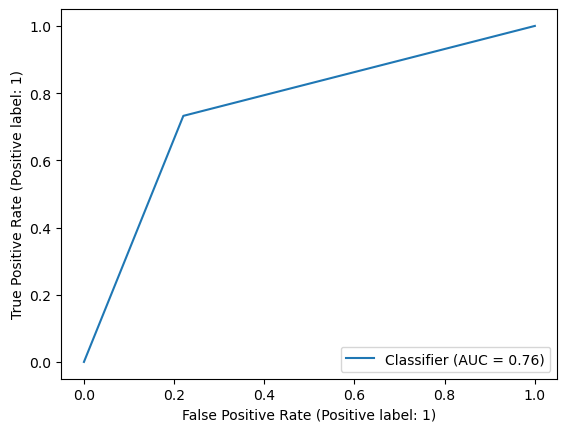

In [79]:
RocCurveDisplay.from_predictions(y_ros,logit_ros_pred)

In [ ]:
# SMOTE - Synthetic Minority Oversampling Technique
# Smote uses KNN Algorithm (Euclidean Distance) and creates artificaial or
# No outliers are created.
# SMOTE also uses Random number generator for generating random weights b/w 0 n 1.

# Two idependent variables - X1 - Income n X2 - Age
# X1 - 2400,2500,2700,2300,2100
# X2 - 46, 34, 45, 28, 25
# Choose a random selected weight b/w 0 n 1. Randomly selected 0.60
# 2500 +0.60*(2400-2500)= 2440 (Synthetic Data point)
# 34 +0.60*(46-34) = 41.20 or 41 (Synthetic Data point)

# SMOTE - works only on Numeric Data
# SMOTENC - For both Numeric and Non Numerical Categorical Data
# SMOTEN - Onlt for Non Numeric Categorical Data.



In [84]:
from imblearn.over_sampling import SMOTEN

In [85]:
smote=SMOTEN(random_state=42)

In [86]:
X_smote,y_smote=smote.fit_resample(X,y)

In [87]:
pd.DataFrame(y_smote).value_counts()

0    21033
1    21033
dtype: int64

In [90]:
logit_smote=LogisticRegression(max_iter=1000)

In [91]:
logit_smote_model=logit_smote.fit(X_smote,y_smote)

In [92]:
logit_smote_model.score(X_smote,y_smote)

0.8121285598820901

In [93]:
logit_smote_pred=logit_smote_model.predict(X_smote)

In [94]:
print(classification_report(y_smote,logit_smote_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



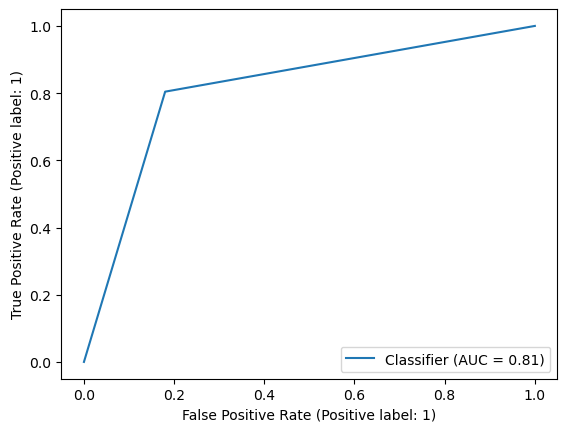

In [96]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_pred)

In [ ]:
# Undersampling Technique - Tomek Links are pairs of observations of 
# opposite classes in close Vincinity.
# In this algorithm, majority class observations are delected from the 
# tomek link, which provide a bettet decision for a classifier.

In [98]:
from imblearn.under_sampling import TomekLinks

In [99]:
tomek=TomekLinks(sampling_strategy='majority')

In [100]:
X_tomek,y_tomek=tomek.fit_resample(X,y)

In [101]:
pd.DataFrame(y_tomek).value_counts()

0    19786
1     5674
dtype: int64

In [102]:
logit_tomek=LogisticRegression(max_iter=3000)

In [103]:
logit_tomek_model=logit_tomek.fit(X_tomek,y_tomek)

In [104]:
logit_tomek_model.score(X_tomek,y_tomek)

0.8316575019638649

In [105]:
logit_tomek_pred=logit_tomek_model.predict(X_tomek)

In [106]:
print(classification_report(y_tomek,logit_tomek_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     19786
           1       0.69      0.44      0.54      5674

    accuracy                           0.83     25460
   macro avg       0.77      0.69      0.72     25460
weighted avg       0.82      0.83      0.82     25460



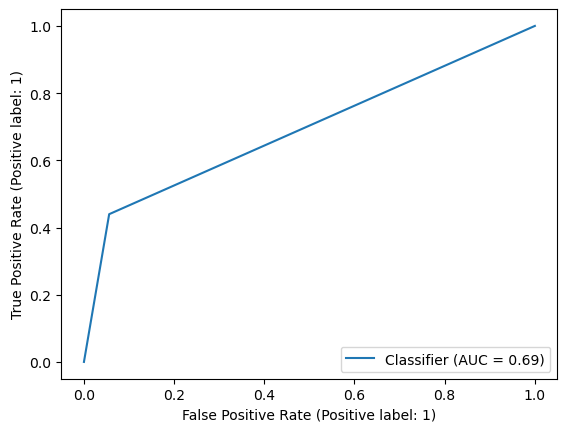

In [107]:
RocCurveDisplay.from_predictions(y_tomek,logit_tomek_pred)

In [123]:
y_seasonal=flulabels.seasonal_vaccine

In [124]:
y_seasonal=LabelEncoder().fit_transform(y_seasonal)

In [125]:
logit_seasonal=LogisticRegression(max_iter=1000)

In [127]:
logit_seasonal_model=logit_seasonal.fit(X,y_seasonal)

In [129]:
logit_seasonal_pred=logit_seasonal_model.predict_proba(flu_test)

In [130]:
logit_smote_h1n1=logit_smote_model.predict_proba(flu_test)

In [131]:
pd.DataFrame(logit_seasonal_pred).to_csv("log_season.csv")

In [132]:
pd.DataFrame(logit_smote_h1n1).to_csv("log_h1n1.csv")